# Problem Statement: Concrete Strength Prediction

## Objective
- To predict the concrete strength using the data available in file concrete_data.xls. 
- Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

### Attribute details
Name -- Data Type -- Measurement -- Description
- Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age(age) -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [1]:
# Importing Necessary Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics

%matplotlib inline

In [2]:
# Reading Data File and printing first 5 rows of data to understand
df= pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
# Shape of Data
print('Shape of Data :',df.shape)

Shape of Data : (1030, 9)


- There are 1030 rows 
- There are 8 predictor and 1 Output Variable

In [4]:
# Data Types
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

- All predictors and output varibale are Numerical type

In [5]:
# Checking for Null Values in data
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

- There are no Null values in data

In [6]:
# Checking for Skewness
df.skew(axis=0)

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [7]:
# Chekcing for Duplicate Rows
df.duplicated().value_counts()[True]

25

- There are 25 rows of duplicated data

In [8]:
# Printing Duplicated DataFrame
df[df.duplicated()]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [9]:
# Dropping Duplicated Data
df.drop_duplicates(inplace=True)

In [10]:
# To describe Mean, Median and Quartile of Data Set
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


- There are some attributes with zero values as well
- Slag has 25% data as 0
- Ash has 25% data as 0
- SuperPlastic has 25% data as 0


## Exploratory Data Analysis

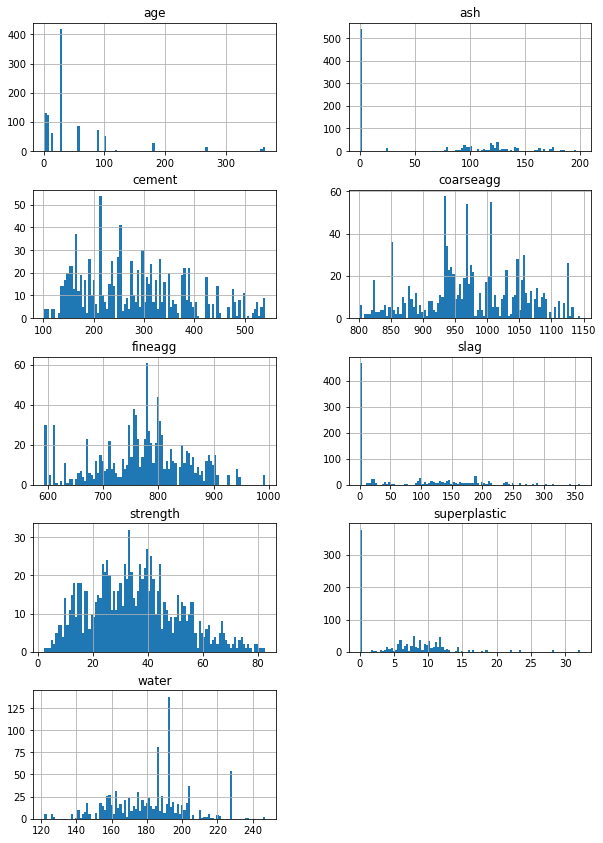

In [11]:
df.hist(stacked=False, bins=100, figsize=(10,30), layout=(10,2)); 

#### Plotting Histogram of Data

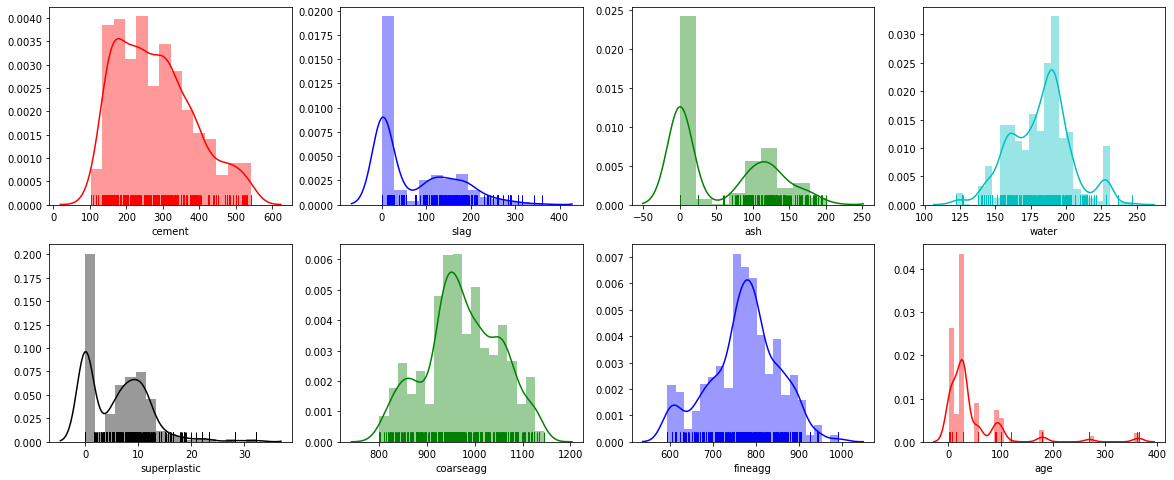

In [12]:
x_cor=[0,1]
y_cor=[0,1,2,3]
cols = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age',]
color=['r', 'b', 'g', 'c', 'k', 'g','b', 'r',]
a=0
fig,ax=plt.subplots(2,4,figsize=(20,8))
for i in x_cor:
    for j in y_cor:
        col=cols[a]
        clr=color[a]
        sns.distplot(df[col],color=clr,rug=True,ax=ax[i][j]) 
        a=a+1

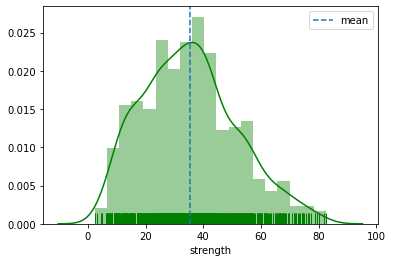

In [13]:
# Concrete Strength Plot

sns.distplot(df['strength'],color='g',rug=True)
plt.axvline(df['strength'].mean(),linestyle="dashed",label="mean")
plt.legend()

In [14]:
# Outlier Detection using Inter Quartile Range

q3 = df.quantile(0.75)
q1 = df.quantile(0.25)
iqr = q3 - q1
print('IQR ')
print(iqr)
print('---------------------------------------\n')

data_out = df[~((df< (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(df.shape[0] - data_out.shape[0]))

IQR 
cement          158.30
slag            142.50
ash             118.30
water            26.30
superplastic     10.00
coarseagg        99.00
fineagg          97.90
age              49.00
strength         21.35
dtype: float64
---------------------------------------

94 points are outliers based on IQR


In [15]:
# Plottong Corelation between attribues
df.iloc[:,:-1].corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000


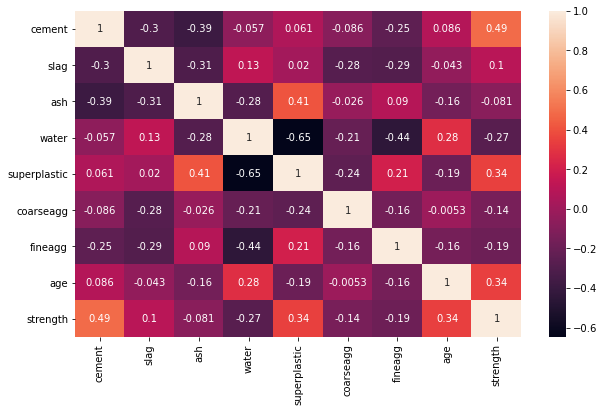

In [16]:
# Heatmap to show relation of attributes
corr=df.corr()
fig=plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

- Cement is highly corelated to Strength
- Superplastic is corelated 
- Age is corlated
- SuperPlastic and water are highly Negatively corelated

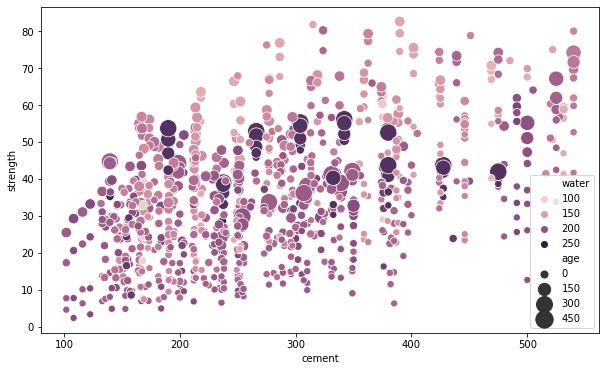

In [17]:
fig=plt.figure(figsize=(10,6))
ax=sns.scatterplot(y="strength", x="cement", hue="water",size="age", data=df,sizes=(50, 300) )

- Strength of Concrete increase by adding more cement
- In order to gain strength of concrete,less quantity of cement can be added, provided the age is more
- Concrete strength is increased if less quantity of water is used

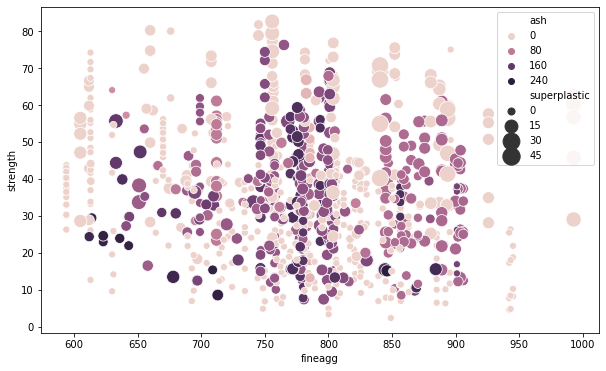

In [18]:
fig=plt.figure(figsize=(10,6))
sns.scatterplot(y="strength", x="fineagg", hue="ash",
   size="superplastic", data=df, sizes=(50, 300))

- Strength of concrete is more if less amount of Ash are used
- Strength of concrete increases if more amount of SuperPlastics are used

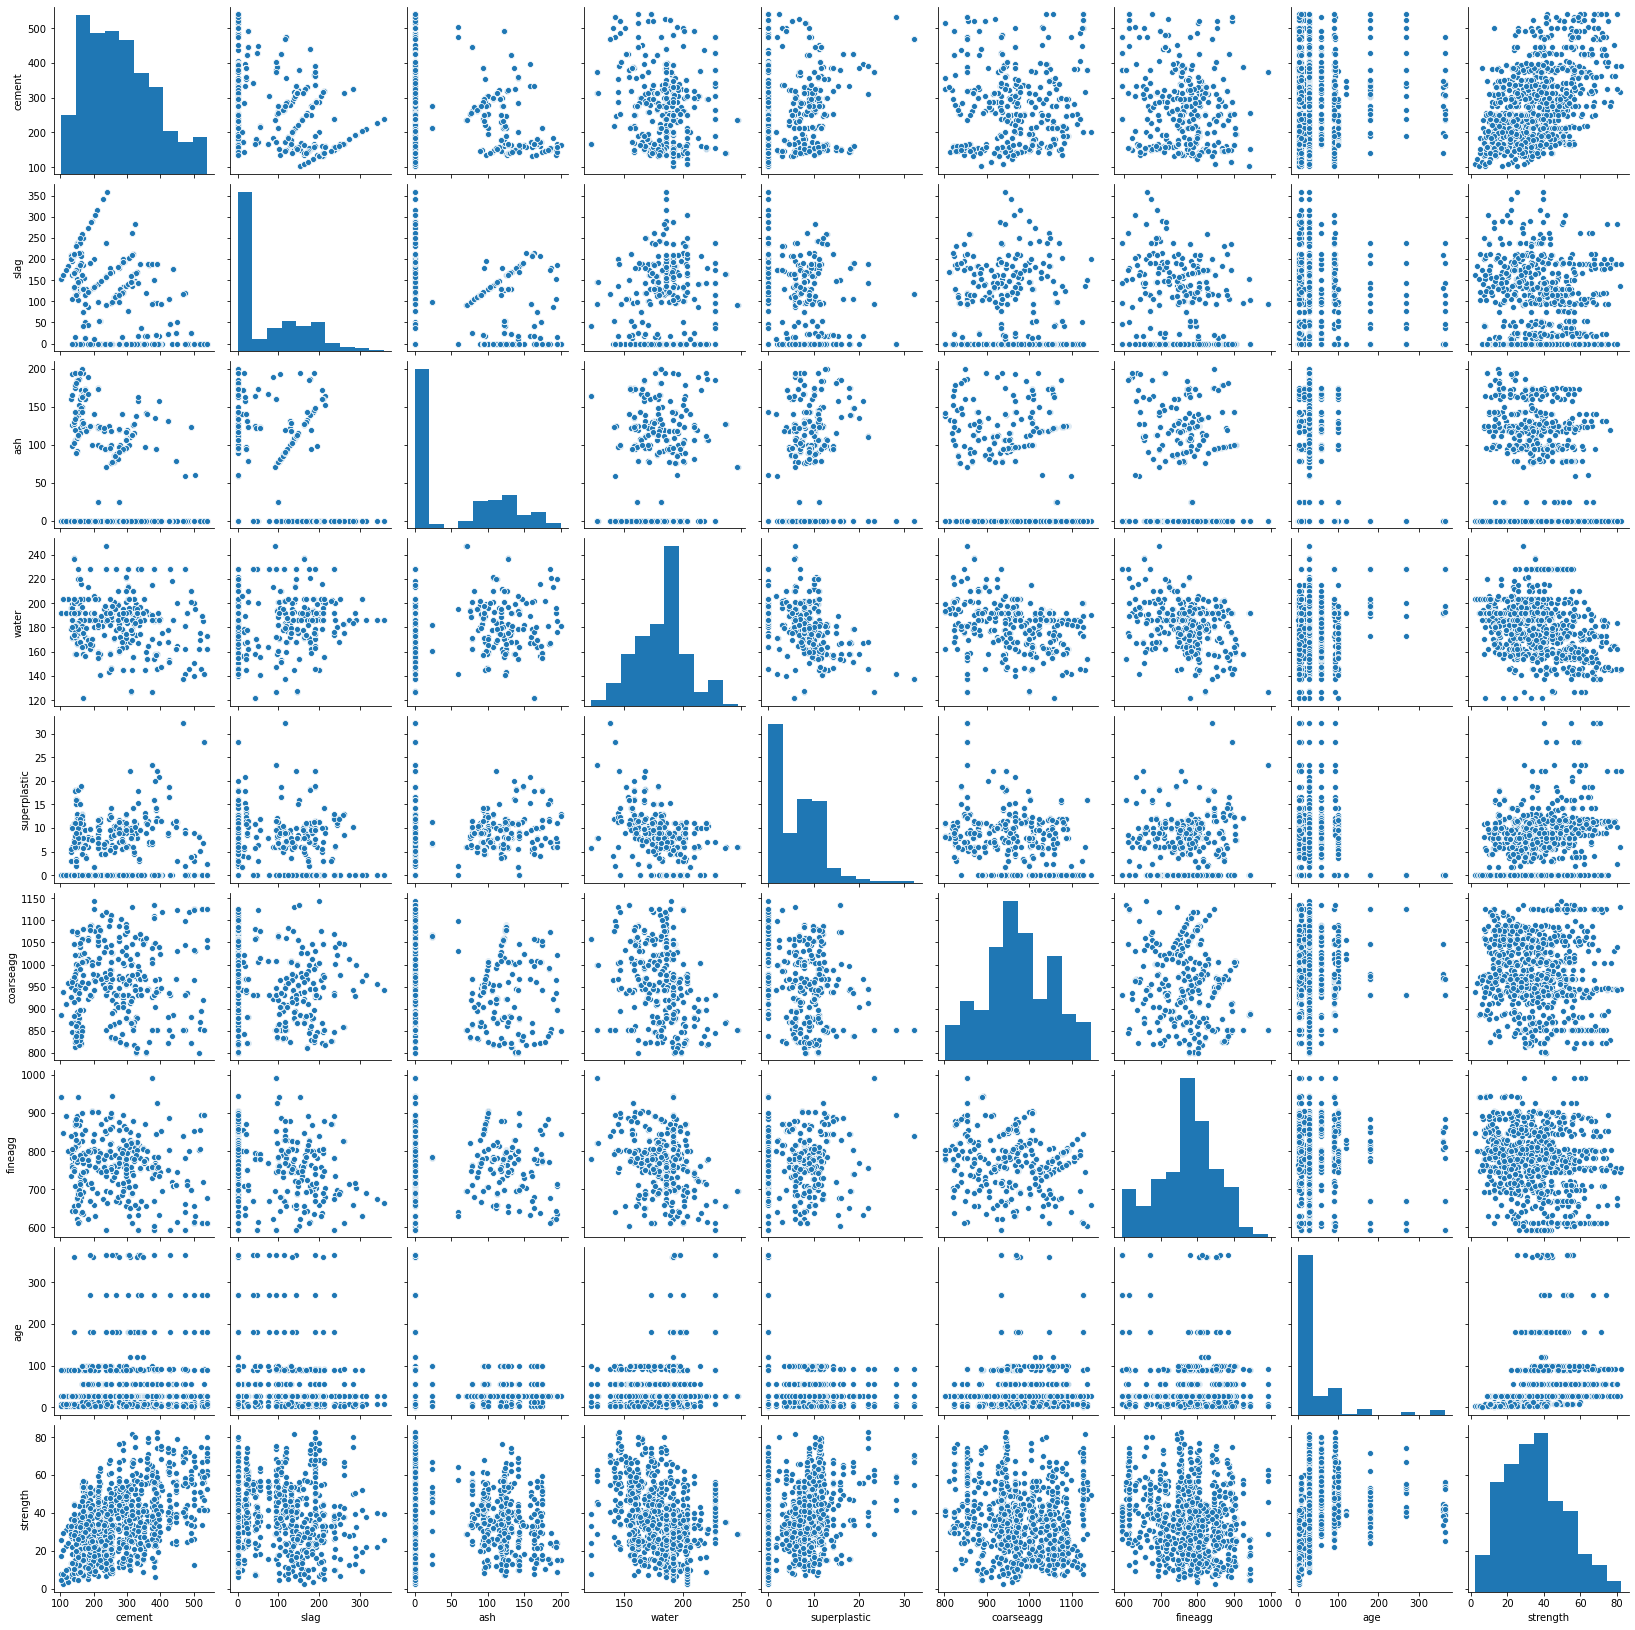

In [19]:
# Plotting Pairplot to visulaize relation of attributes
sns.pairplot(df)

## Data Preparation for Model

In [20]:
X= df.drop(columns='strength')
y=df['strength']

In [21]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=1)

# Model Building

- As this evaluation is related to Regression, we can use RMSE and R2 value for model's performance evaluation
- RMSE- Root Mean Square Error
- R2 Value- R Square

## 1. Linear Regression

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict_lr=lr.predict(X_test)

In [23]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))

The coefficient for cement is 0.12719470079048062
The coefficient for slag is 0.10766879872620044
The coefficient for ash is 0.09372811611499239
The coefficient for water is -0.11777247197956044
The coefficient for superplastic is 0.33736233408337946
The coefficient for coarseagg is 0.02202720601291604
The coefficient for fineagg is 0.031004595510684956
The coefficient for age is 0.11183760304669738


In [24]:
print('Intercept', lr.intercept_)

Intercept -44.38052311209701


In [25]:
print('Training Accuracy', lr.score(X_train,y_train))   ##The score (R^2) for in-sample 
print('Testing Accuracy', lr.score(X_test,y_test))      ##The score (R^2) for out of sample

Training Accuracy 0.6178137386730576
Testing Accuracy 0.5319152721265307


In [26]:
print("Model\t\t\t RMSE \t\t R2") 
print("""LinearRegression\t {:.2f}\t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_predict_lr)), r2_score(y_test, y_predict_lr))) 

# Creating DataFrame of Metrics
df_RMSE_R2= pd.DataFrame({'Model Name': ['Linear Regression'],
                          'RMSE':np.sqrt(mean_squared_error(y_test, y_predict_lr)) ,
                          'R2': r2_score(y_test, y_predict_lr)})

Model			 RMSE 		 R2
LinearRegression	 10.51		0.53


## Using Interaction Terms

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3, interaction_only=True)

In [28]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

In [29]:
poly_clf= LinearRegression()
poly_clf.fit(X_train_poly, y_train)
y_predict_poly= poly_clf.predict(X_test_poly)

In [30]:
print('Polynomial Feature Training Accuracy',poly_clf.score(X_train_poly,y_train))
print('Polynomial Feature Testing Accuracy',poly_clf.score(X_test_poly,y_test))

Polynomial Feature Training Accuracy 0.7983611897555415
Polynomial Feature Testing Accuracy 0.6669125544027237


In [31]:
print("Model\t\t\t\t RMSE \t\t R2") 
print("""LinearRegression_Polynomial \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_predict_poly)), r2_score(y_test, y_predict_poly))) 

# Concat Metrics DataFrame
df_RMSE_R2_tmp= pd.DataFrame({'Model Name': ['LinearRegression_Polynomial'],
                          'RMSE':np.sqrt(mean_squared_error(y_test, y_predict_poly)) ,
                          'R2': r2_score(y_test, y_predict_poly)})
df_RMSE_R2= pd.concat([df_RMSE_R2,df_RMSE_R2_tmp])

Model				 RMSE 		 R2
LinearRegression_Polynomial 	 8.86 		0.67


Text(0.5, 1.0, 'Linear Regression using Interaction')

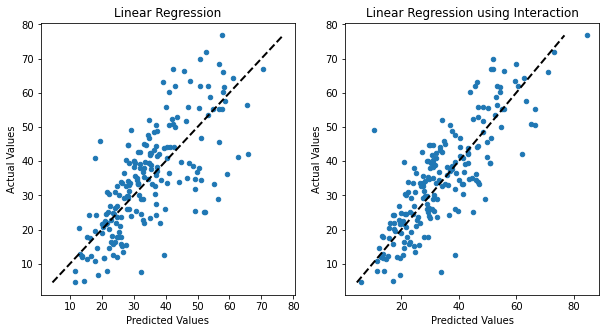

In [32]:
# Plotting Predicted and Actual Values

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.scatter(y_predict_lr, y_test, s=20) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("Actual Values") 
ax1.set_xlabel("Predicted Values") 
ax1.set_title("Linear Regression")

ax2.scatter(y_predict_poly, y_test, s=20) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("Actual Values") 
ax2.set_xlabel("Predicted Values") 
ax2.set_title("Linear Regression using Interaction")

### Trees/Ensemble based Algorithm

In [33]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr=dtr.fit(X_train,y_train)
y_predict_dtr= dtr.predict(X_test)

# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
bgr=BaggingRegressor()
bgr=bgr.fit(X_train,y_train)
y_predict_bgr= bgr.predict(X_test)


## Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)
y_predict_rfr=rfr.predict(X_test)


## Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_predict_gbr=rfr.predict(X_test)


In [34]:
print("Model\t\t\t\t RMSE \t\t R2") 
print("""LinearRegression\t\t {:.2f}\t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_predict_lr)), r2_score(y_test, y_predict_lr))) 
print("""LinearRegression_Polynomial \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_predict_poly)), r2_score(y_test, y_predict_poly))) 
print("""Decision Tree Regressor \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_predict_dtr)), r2_score(y_test, y_predict_dtr))) 
print("""Bagging Regressor \t\t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_predict_bgr)), r2_score(y_test, y_predict_bgr))) 
print("""Random Forest Regressor \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_predict_rfr)), r2_score(y_test, y_predict_rfr))) 
print("""Gradient Boosting Regressor \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_predict_gbr)), r2_score(y_test, y_predict_gbr))) 

Model				 RMSE 		 R2
LinearRegression		 10.51		0.53
LinearRegression_Polynomial 	 8.86 		0.67
Decision Tree Regressor 	 8.44 		0.70
Bagging Regressor 		 5.51 		0.87
Random Forest Regressor 	 5.44 		0.87
Gradient Boosting Regressor 	 5.44 		0.87


In [35]:
# concat metrics of Decision Tree Regressor
df_RMSE_R2_tmp= pd.DataFrame({'Model Name': ['Decision Tree Regressor'],
                          'RMSE':np.sqrt(mean_squared_error(y_test, y_predict_dtr)) ,
                          'R2': r2_score(y_test, y_predict_dtr)})
df_RMSE_R2= pd.concat([df_RMSE_R2,df_RMSE_R2_tmp])

# concat metrics of Bagging Regressor
df_RMSE_R2_tmp= pd.DataFrame({'Model Name': ['Bagging Regressor'],
                          'RMSE':np.sqrt(mean_squared_error(y_test, y_predict_bgr)) ,
                          'R2': r2_score(y_test, y_predict_bgr) })
df_RMSE_R2= pd.concat([df_RMSE_R2,df_RMSE_R2_tmp])

# concat metrics of Random Forest Regressor
df_RMSE_R2_tmp= pd.DataFrame({'Model Name': ['Random Forest Regressor'],
                          'RMSE':np.sqrt(mean_squared_error(y_test, y_predict_rfr)) ,
                          'R2': r2_score(y_test, y_predict_rfr)})
df_RMSE_R2= pd.concat([df_RMSE_R2,df_RMSE_R2_tmp])

# concat metrics of Gradient Boosting Regressor
df_RMSE_R2_tmp= pd.DataFrame({'Model Name': ['Gradient Boosting Regressor'],
                          'RMSE':np.sqrt(mean_squared_error(y_test, y_predict_gbr)) ,
                          'R2': r2_score(y_test, y_predict_gbr) })
df_RMSE_R2= pd.concat([df_RMSE_R2,df_RMSE_R2_tmp])

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format
df_RMSE_R2    ### Data Frame consisting of Metrics Root Mean Squared Error and R2 value

,Model Name,RMSE,R2
0,Linear Regression,10.51,0.53
0,LinearRegression_Polynomial,8.86,0.67
0,Decision Tree Regressor,8.44,0.70
0,Bagging Regressor,5.51,0.87
0,Random Forest Regressor,5.44,0.87
0,Gradient Boosting Regressor,5.44,0.87



- Gradient Boosting Regressor has better performance.
- Random Forest Regressor trains randomly initialized trees with random subsets of data 

In [36]:
# Evaluating Feature Importances
features_dtr= dtr.feature_importances_
features_rfr= rfr.feature_importances_
features_gbr= gbr.feature_importances_

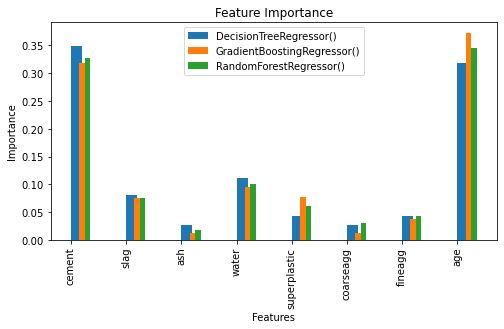

In [37]:
# Plotting Featue Importances
labels = X_train.columns
x = np.arange(len(labels)) 
fig, ax = plt.subplots(figsize=(8,4)) 
ax.bar(x+0.1,features_dtr,width=0.2, label=dtr)
ax.bar(x+0.2,features_gbr,width=0.1,label=gbr)
ax.bar(x+0.3,features_rfr,width=0.1,label=rfr)
ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=90) 
plt.legend()
plt.show()

# K-fold cross-validation

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## K-Fold on Linear Regression

num_folds=10
seed=5
kfold=KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model=LinearRegression()
results = cross_val_score(model,X,y, cv=kfold)
print(results)
print("Linear Regression Accuracy: %.3f%%  Std: %.3f%%" % (results.mean()*100.0, results.std()*100.0))


ResultsDf= pd.DataFrame({'Model Name': ['Linear Regression'],'Accuracy':[results.mean()*100.0 ],'STD':[results.std()*100.0]})

[0.51589995 0.56619674 0.64497826 0.55572361 0.66143235 0.52822376
 0.5591832  0.59241163 0.49004396 0.71211651]
Linear Regression Accuracy: 58.262%  Std: 6.670%


In [39]:
## K-Fold on Decision Tree Regressor

num_folds=10
seed=5
kfold=KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model=DecisionTreeRegressor()
results = cross_val_score(model,X,y, cv=kfold)
print(results)
print("Decision Tree Regressor Accuracy: %.3f%%  Std: %.3f%%" % (results.mean()*100.0, results.std()*100.0))


tempResultsDf= pd.DataFrame({'Model Name': ['Decsion Tree Regressor'],'Accuracy':[results.mean()*100.0 ],'STD':[results.std()*100.0]})
ResultsDf= pd.concat([ResultsDf,tempResultsDf])

[0.89839236 0.85157186 0.80880196 0.81113618 0.86598041 0.86108016
 0.87182797 0.82226207 0.87567579 0.89207316]
Decision Tree Regressor Accuracy: 85.588%  Std: 3.043%


In [40]:
## K-Fold on Random Forest Regressor

num_folds=10
seed=5
kfold=KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model=RandomForestRegressor()
results = cross_val_score(model,X,y, cv=kfold)
print(results)
print("Random Forest Regressor Accuracy: %.3f%%  Std: %.3f%%" % (results.mean()*100.0, results.std()*100.0))


tempResultsDf= pd.DataFrame({'Model Name': ['Random Forest Regressor'],'Accuracy':[results.mean()*100.0 ],'STD':[results.std()*100.0]})
ResultsDf= pd.concat([ResultsDf,tempResultsDf])

[0.92973369 0.89893076 0.9362759  0.89664042 0.91649142 0.91969126
 0.92624392 0.86707403 0.92770324 0.91310943]
Random Forest Regressor Accuracy: 91.319%  Std: 1.961%


In [41]:
## K-Fold on Gradient Boosting Regressor

num_folds=10
seed=5
kfold=KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model=GradientBoostingRegressor()
results = cross_val_score(model,X,y, cv=kfold)
print(results)
print("Gradient Boosting Regressor Accuracy: %.3f%%  Std: %.3f%%" % (results.mean()*100.0, results.std()*100.0))

tempResultsDf= pd.DataFrame({'Model Name': ['Gradient Boosting Regressor'],'Accuracy':[results.mean()*100.0 ],'STD':[results.std()*100.0]})
ResultsDf= pd.concat([ResultsDf,tempResultsDf])

[0.90329566 0.88608882 0.92819294 0.88527857 0.8892463  0.87854645
 0.90721864 0.91204381 0.91812217 0.89900228]
Gradient Boosting Regressor Accuracy: 90.070%  Std: 1.521%


In [42]:
ResultsDf

,Model Name,Accuracy,STD
0,Linear Regression,58.26,6.67
0,Decsion Tree Regressor,85.59,3.04
0,Random Forest Regressor,91.32,1.96
0,Gradient Boosting Regressor,90.07,1.52


- Gradient Boosting Regressor has better Accuracy and Standard Deviation

# RandomizedSearchCV 

In [43]:
from sklearn.model_selection import RandomizedSearchCV

### 1. Using Random Forest Regressor

In [44]:
rand_clf= RandomForestRegressor(random_state=50)

In [45]:
# Current Parameters used by RandomForest Regressor

rand_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 50,
 'verbose': 0,
 'warm_start': False}

## Trying to use Randomized search for following Parameters

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [46]:
# specify parameters and distributions to sample from
param_dist = {"n_estimators":[int(x) for x in np.linspace(start=100,stop=1000, num=10)],
              "max_features": ['auto','sqrt'],
              "max_depth": [1,3,5,8,10,30,50,100,None],
              "min_samples_split": [2,3,7,9,10],
              "min_samples_leaf": [1,2,4],
              "bootstrap": [True, False]}


param_dist

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [1, 3, 5, 8, 10, 30, 50, 100, None],
 'min_samples_split': [2, 3, 7, 9, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

- In each iteration, the algorithm will select a different combination of the features. 
- There are 10 * 2 * 9 * 5 * 3 * 2 = 5400 different options.
- In random Search it does not take into consideration all but selects randomly

In [47]:
# run randomized search 
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(rand_clf, param_distributions=param_dist, n_iter=samples,cv=10)

In [48]:
randomCV.fit(X, y)
print(randomCV.best_params_)

{'n_estimators': 900, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [49]:
num_folds=10
seed=5
kfold=KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model=RandomForestRegressor(bootstrap= True, max_depth= 100, max_features= 'auto',
                            min_samples_leaf= 4, min_samples_split= 7, n_estimators= 400)


results = cross_val_score(model,X,y, cv=kfold)
print(results)
print("Random Forest Regressor Accuracy: %.3f%%  Std: %.3f%%" % (results.mean()*100.0, results.std()*100.0))


ResultsDf_Tuned= pd.DataFrame({'Model Name': ['Random Forest Regressor'],'Accuracy':[results.mean()*100.0 ],'STD':[results.std()*100.0]})

[0.90864392 0.86632054 0.90748505 0.89135233 0.89164628 0.89583201
 0.89964899 0.8566262  0.90086796 0.88356906]
Random Forest Regressor Accuracy: 89.020%  Std: 1.618%


### 2. Using Gradient Boosting Regressor

In [50]:
gb_clf= GradientBoostingRegressor(random_state=50)

In [51]:
gb_clf.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 50,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [52]:
# specify parameters and distributions to sample from
param_dist = {"n_estimators":[int(x) for x in np.linspace(start=100,stop=1000, num=10)],
              "max_features": ['auto', 'sqrt', 'log2'],
              "max_depth": [1,3,5,7,8,10,30,50,100,None],
              "min_samples_split": [2,3,7,9,10],
              "min_samples_leaf": [1,2,4],
              "learning_rate": [0.1,0.5, 0.01, 0.05],
              "alpha":[0.5, 0.7, 0.9]}


param_dist

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [1, 3, 5, 7, 8, 10, 30, 50, 100, None],
 'min_samples_split': [2, 3, 7, 9, 10],
 'min_samples_leaf': [1, 2, 4],
 'learning_rate': [0.1, 0.5, 0.01, 0.05],
 'alpha': [0.5, 0.7, 0.9]}

- In each iteration, the algorithm will select a different combination of the features. 
- There are 10 * 3 * 10 * 5 * 3 * 4 * 3 = 54000 different options.
- In random Search it does not take into consideration all but selects randomly

In [53]:
# run randomized search 
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(gb_clf, param_distributions=param_dist, n_iter=samples,cv=10)

In [54]:
randomCV.fit(X, y)
print(randomCV.best_params_)

{'n_estimators': 500, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1, 'alpha': 0.5}


In [55]:
num_folds=10
seed=5
kfold=KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model=GradientBoostingRegressor(learning_rate= 0.05, max_depth= 30, max_features= 'log2',
                            min_samples_leaf= 4, min_samples_split= 5, n_estimators= 1000, alpha=0.9)


results = cross_val_score(model,X,y, cv=kfold)
print(results)
print("Gradient Boosting Regressor Accuracy: %.3f%%  Std: %.3f%%" % (results.mean()*100.0, results.std()*100.0))


temptunedResultsDf= pd.DataFrame({'Model Name': ['Gradient Boosting Regressor'],'Accuracy':[results.mean()*100.0 ],'STD':[results.std()*100.0]})
ResultsDf_Tuned= pd.concat([ResultsDf_Tuned,temptunedResultsDf])

[0.94079177 0.92508854 0.96043335 0.90326059 0.93571815 0.93305704
 0.94895215 0.87927901 0.95870416 0.9383516 ]
Gradient Boosting Regressor Accuracy: 93.236%  Std: 2.365%


In [56]:
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

ResultsDf_Tuned

,Model Name,Accuracy,STD
0,Random Forest Regressor,89.02,1.62
0,Gradient Boosting Regressor,93.24,2.37


- Gradient Boosting has better accuracy